# ######## Janatahack: Cross-sell Prediction

#Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

##############################################################################################################################

 Cross-selling identifies products or services that satisfy additional, complementary needs that are unfulfilled by the original product that a customer possesses. As an example, a mouse could be cross-sold to a customer purchasing a keyboard. Oftentimes, cross-selling points users to products they would have purchased anyways; by showing them at the right time, a store ensures they make the sale.




Cross-selling is prevalent in various domains and industries including banks. For example, credit cards are cross-sold to people registering a savings account. In ecommerce, cross-selling is often utilized on product pages, during the checkout process, and in lifecycle campaigns. It is a highly-effective tactic for generating repeat purchases, demonstrating the breadth of a catalog to customers. Cross-selling can alert users to products they didn't previously know you offered, further earning their confidence as the best retailer to satisfy a particular need.






This weekend we invite you to participate in another Janatahack with the theme of Cross-sell prediction. Stay tuned for the problem statement and datasets this Friday and get a chance to work on a real industry case study along with 250 AV points at stake.

# So here we need to predict if the customer will purchase the vechile insurance or not. We have in-total of 11 features to predict the output

1) ID

2) Gender

3) Age

4) Driving_License

5) Region_code

6) Previously_Insured

7) Vehicle_Age

8) Annual_Premium	

9) Policy_Sales_Channel	

10) Vintage

11) Response:- This is the output to be predicted

##################################################################

# Here we are going to import some of the libraries and the training data.

In [1]:
import pandas as pd # This is to do EDA
import numpy as np  # numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays

In [2]:
train_file = pd.read_csv("train.csv") #using read_csv command from padas we are importing data to jupyer notebook

In [3]:
train_file #The data is imported to jupyter notebook. Now let us expore the data and see what the data is saying all about

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
train_file.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
len(train_file['id'].unique())

381109

In [6]:
train_file.shape

(381109, 12)

# Let us check the corrrelation for each feature with output, also let us check if this dataset is balanced or imbalanced

1) What is imbalanced dataset and also let me explaint why do we need to check a dataset is imbalanced

    For a classification dataset, the training data set for each classification should have a good amount of data to train the model. For examble, if this is a 2 class classification problem to predict, both the classfication should carry a dataset in a ration of 7:3 or 6:4 or 5:5. Anything lesser than this is an imbalanced dataset. 
    
    #############################################################################################################
    
Now let me explain why and what is the impact of an imbalanced dataset. 
    
    If the dataset is imbalanced then the result of one classfication prediction will be good and another won't be

In [7]:
import seaborn as sns # This library is to visuvalise the data for better understanding
import matplotlib.pyplot as plt

In [8]:
train_file.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [9]:
train_file.Response.value_counts()/train_file.shape[0]

0    0.877437
1    0.122563
Name: Response, dtype: float64

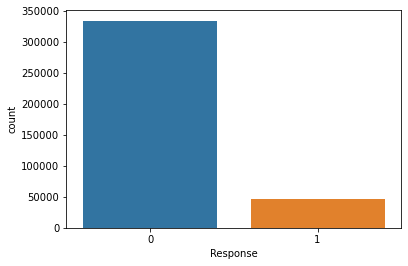

_____________________________________________


0    1.139683
1    8.159045
Name: Response, dtype: float64

In [10]:
sns.countplot(train_file['Response'])
plt.show()

print("_____________________________________________")

len(train_file['Response'])/train_file['Response'].value_counts()

# From the above visuvalization it is understandable that this an imbalanced dataset. Will Balance the data after sometime. Now let us do some other activity

# Now let us check the null values

In [11]:
train_file.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There is no null values in the dataset as per the observation

# Now let us check for the outlier.

Before that let me explain why do we have to check for outliers 


Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

In [12]:
train_file.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


{'whiskers': [<matplotlib.lines.Line2D at 0x17b5fa56190>,
 'caps': [<matplotlib.lines.Line2D at 0x17b5fa56850>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b5fa46df0>],
 'medians': [<matplotlib.lines.Line2D at 0x17b5fa56f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b5fa61250>],
 'means': []}

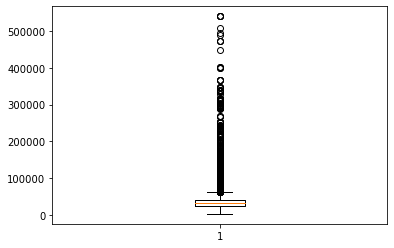

In [13]:
plt.boxplot(train_file['Annual_Premium']) 

# Using the same box plot we checked and non of the feature had outlier and this is the only feature which has lots of outlier

# We shall remove the outliers in sometime after the EDA

# Now let us encode the character variable to numerical

In [14]:
objects_ = train_file.select_dtypes(include = "O")

In [15]:
objects_

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


# Now from here we understood that there are There are 3 catogorical variable in this. Now we need to encode this. Let us see if we have to use one hot or label encoding 

######################################################################################################################

# There are 2 types of encoding. One is one hoted encoding and another one is label encoding. 

1) One hot encoding is:
    We do one hot encoding when the data does not have an odinality (eg: east west south north). One hot encoding will create new feature on basis of the unique value under that categorical variable and it will represent 
    it by 0's and 1's
    
2) Label encoding:
    Label encoding is when the data does have an odinality in it (eg: small medium large extra large). Label encoding will 
    change these data in to 1 2 3 etc.

# Now let us see Gender

In [16]:
train_file['Gender'].unique() # This data has some ordinality in the data and Hence let us go ahead with Lebel encoding

array(['Male', 'Female'], dtype=object)

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [18]:
train_file['Gender'] = le.fit_transform(train_file['Gender'])

# Now let us see Vehicle_Age

In [19]:
train_file['Vehicle_Age'].unique() # as there is an ordinality we shall use label encoding in this. 

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [20]:
train_file['Vehicle_Age'] = le.fit_transform(train_file['Vehicle_Age'])

# Now let us see Vehicle_Damage

In [21]:
train_file['Vehicle_Damage'].unique()  # as there is an ordinality we shall use label encoding in this. 

array(['Yes', 'No'], dtype=object)

In [22]:
train_file['Vehicle_Damage'] = le.fit_transform(train_file['Vehicle_Damage'])

In [23]:
train_file['Vehicle_Damage'] 

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    1
381108    0
Name: Vehicle_Damage, Length: 381109, dtype: int32

# Now let us concat the concat  all together 

In [24]:
objects_.columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [25]:
objects_endcoded = pd.concat([train_file['Gender'], train_file['Vehicle_Age'], train_file['Vehicle_Damage']],axis = 1)

In [26]:
objects_endcoded

,Gender,Vehicle_Age,Vehicle_Damage
0,1,2,1
1,1,0,0
2,1,2,1
3,1,1,0
4,0,1,0
...,...,...,...
381104,1,0,0
381105,1,1,0
381106,1,1,0
381107,0,2,1


# All the encoding is doing only because the machine can understand only numeric datas and not catgorical

################################################################################################################

In [27]:
train_file

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


# Now let us see the corr 

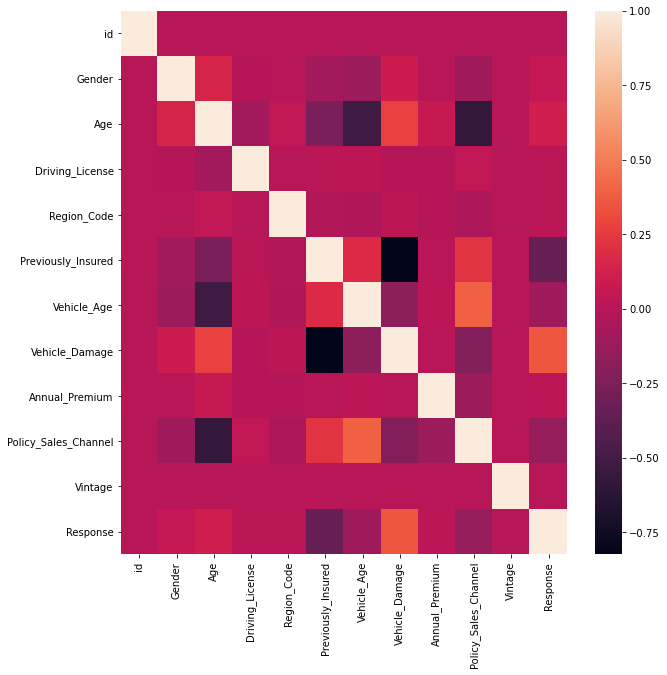

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(train_file.corr())

# The below are correlated

Age--> Policy_sales_channel

Age--> Vehicle age

Previously_Insured --> Vehicle Damage

In [29]:
#train_file.columns
train_file.Policy_Sales_Channel

0          26.0
1          26.0
2          26.0
3         152.0
4         152.0
          ...  
381104     26.0
381105    152.0
381106    160.0
381107    124.0
381108     26.0
Name: Policy_Sales_Channel, Length: 381109, dtype: float64

In [30]:
#train_file.columns
train_file.Vehicle_Age

0         2
1         0
2         2
3         1
4         1
         ..
381104    0
381105    1
381106    1
381107    2
381108    0
Name: Vehicle_Age, Length: 381109, dtype: int32

In [31]:
#train_file.columns
train_file.Previously_Insured

0         0
1         0
2         0
3         1
4         1
         ..
381104    1
381105    1
381106    1
381107    0
381108    0
Name: Previously_Insured, Length: 381109, dtype: int64

In [32]:
train_file.Age

0         44
1         76
2         47
3         21
4         29
          ..
381104    74
381105    30
381106    21
381107    68
381108    46
Name: Age, Length: 381109, dtype: int64

In [33]:
train_file.Vehicle_Age

0         2
1         0
2         2
3         1
4         1
         ..
381104    0
381105    1
381106    1
381107    2
381108    0
Name: Vehicle_Age, Length: 381109, dtype: int32

# NOT removing any feature as removing does not make any sense because most of the features has binary inputs

#######################################################################################################################

# Now let us check the correlation between the output and features inside

In [34]:
train_file.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [35]:
len(train_file.columns)

12

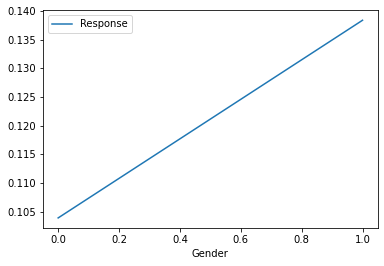

In [36]:
train_file[["Gender", "Response"]].groupby("Gender").mean().plot() #As this is a Gender column this columns cannot say much on Response

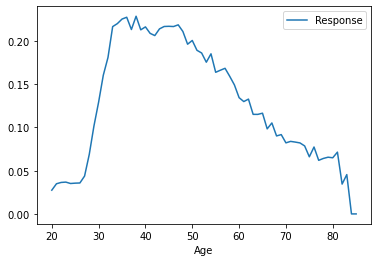

In [37]:
train_file[["Age", "Response"]].groupby("Age").mean().plot() # from 3 to 50 years old people are purchasing more

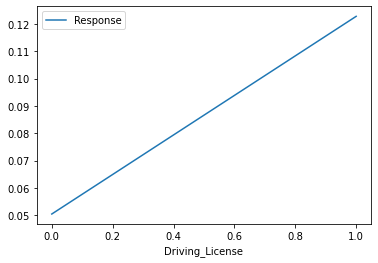

In [38]:
train_file[["Driving_License", "Response"]].groupby("Driving_License").mean().plot() # As the unique values less unique values we cannot judge

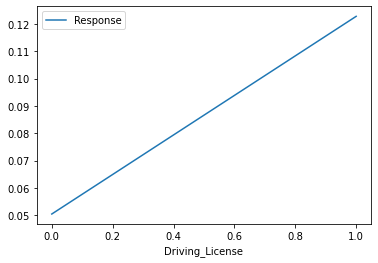

In [39]:
train_file[["Driving_License", "Response"]].groupby("Driving_License").mean().plot() # As the unique values less unique values we cannot judge

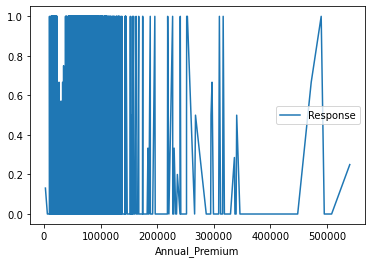

In [40]:
train_file[["Annual_Premium", "Response"]].groupby("Annual_Premium").mean().plot() # The reponse and Annnual is saying something

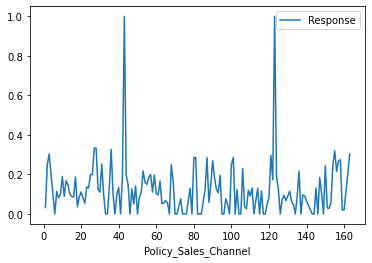

In [41]:
train_file[["Policy_Sales_Channel", "Response"]].groupby("Policy_Sales_Channel").mean().plot() # The Policy_Sales_Channel Annnual is saying something

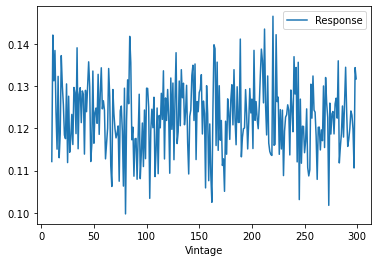

In [42]:
train_file[["Vintage", "Response"]].groupby("Vintage").mean().plot() # as Vintage is not saying anything let us remove this

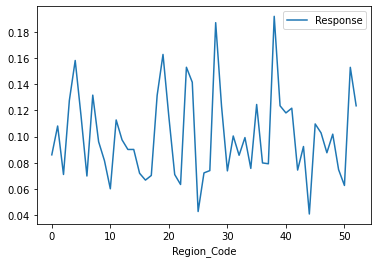

In [43]:
train_file[["Region_Code", "Response"]].groupby("Region_Code").mean().plot() # Region_Code is saying something hence let us keep this

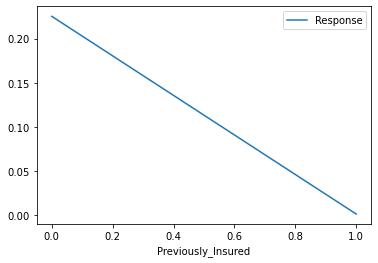

In [44]:
train_file[["Previously_Insured", "Response"]].groupby("Previously_Insured").mean().plot() # as the feature is less, we can't judge

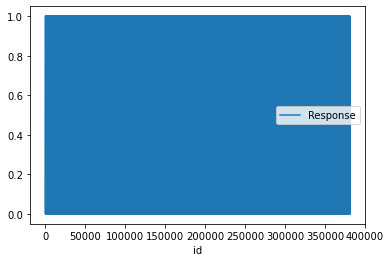

In [45]:
train_file[["id", "Response"]].groupby("id").mean().plot()  # The ID columns does not say anything to the data

In [46]:
train_file.drop(['id','Vintage'], axis = 1, inplace = True) #dropped these column as these column does not says anything

In [47]:
train_file

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,0


# Now let us split the data set in to X and y

In [48]:
X = train_file.drop(['Response'], axis = 1)
y = train_file.Response

# Now let us standadize this data

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X = scaler.fit_transform(X)

In [51]:
X

array([[ 0.92154476,  0.33377727,  0.04620794, ...,  0.99029399,
         0.57453868, -1.58723371],
       [ 0.92154476,  2.39675074,  0.04620794, ..., -1.00980114,
         0.17263624, -1.58723371],
       [ 0.92154476,  0.52718104,  0.04620794, ...,  0.99029399,
         0.4490531 , -1.58723371],
       ...,
       [ 0.92154476, -1.14898491,  0.04620794, ..., -1.00980114,
         0.26454281,  0.88491205],
       [-1.08513449,  1.88100737,  0.04620794, ...,  0.99029399,
         0.81638891,  0.22075349],
       [ 0.92154476,  0.46271311,  0.04620794, ..., -1.00980114,
         0.6513986 , -1.58723371]])

# Now let us split this dataset in to train and test

In [52]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.75)

# The dataset has been split in to train and test. Now let us import some Machine learning Algorithm and train the model

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import svm

In [54]:
RF = RandomForestRegressor()
RF_model = RF.fit(train_X, train_y)
RF_pred = RF_model.predict(test_X)
RR_MSE = mean_squared_error(RF_pred, test_y)

In [55]:
print(RR_MSE)

0.101091616699139


In [56]:
import math

In [57]:
RF_RMSE = math.sqrt(RR_MSE)

In [58]:
RF_RMSE

0.3179490787832841

In [59]:
LR = LogisticRegression()
LR_model = LR.fit(train_X, train_y)
LR_pred = LR_model.predict(test_X)
LR_MSE = mean_squared_error(LR_pred, test_y)

In [60]:
print(LR_MSE)
LR_RMSE = math.sqrt(LR_MSE)
#print("_____________________________")
#print(LR_RMSE)

0.12215917042178623


In [61]:
from sklearn.metrics import accuracy_score # using accuracy metric, we are checking the model accuracy

In [62]:
RF_pred

array([0.  , 0.  , 0.08, ..., 0.  , 0.03, 0.15])

In [63]:
AC = accuracy_score(test_y,LR_pred)

In [64]:
AC

0.8778408295782137

# Let us see the ROC score

In [72]:
from sklearn.metrics import roc_auc_score

In [75]:
ROC_LR = roc_auc_score(test_y,LR_pred)

In [76]:
ROC_LR

0.7840056758580266

# As the score is very less. Let us try SMOTE and see the difference

In [68]:
from imblearn.over_sampling import SMOTE # if you have not imported theimblearn use this commad for windows "conda install -c conda-forge imbalanced-learn" or also refer the website : https://imbalanced-learn.readthedocs.io/en/stable/install.html
from sklearn.metrics import confusion_matrix, classification_report 

In [69]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(train_X, train_y.ravel()) 

In [70]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(test_X) 
  
# print classification report 
print(classification_report(test_y, predictions)) 

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    250916
           1       0.25      0.98      0.40     34916

    accuracy                           0.64    285832
   macro avg       0.62      0.78      0.57    285832
weighted avg       0.90      0.64      0.70    285832



# Let us see the ROC score

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
ROC_LR = roc_auc_score(test_y,predictions)

In [79]:
ROC_LR

0.7840056758580266